In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
IMAGE_SHAPE = (64, 64)
BATCH_SIZE = 12
SEED=100
VAL_SPLIT = 0.2

In [4]:
traindatagen = ImageDataGenerator(validation_split=VAL_SPLIT,rescale=1./255,zoom_range=0.1, width_shift_range=0.2, height_shift_range=0.1)
valdatagen = ImageDataGenerator(rescale=1./255,validation_split=VAL_SPLIT)
traingen = traindatagen.flow_from_directory(
                    "shapes",
                    target_size=IMAGE_SHAPE,
                    color_mode='grayscale', 
                    batch_size=BATCH_SIZE,
                    subset='training', 
                    seed = SEED)
valgen = valdatagen.flow_from_directory("shapes", target_size=IMAGE_SHAPE, color_mode='grayscale', batch_size=BATCH_SIZE, subset='validation', seed = SEED ,shuffle=False)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=40, kernel_size=(3,3),input_shape=(64,64,1),activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.01)),
    #tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=20, kernel_size=(3,3),activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 40)        400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 20)        7220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                180010    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 187,663
Trainable params: 187,663
Non-trainable params: 0
__________________________________________________

In [7]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        val_acc = logs['val_acc']
        train_acc = logs['acc']
        
        if val_acc > 0.96 and train_acc > 0.97:
            print("Stop training! Sufficient validation accuracy reached!")
            self.model.stop_training = True
myCallback = MyCallback()

In [8]:
opt = tf.keras.optimizers.RMSprop(9e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['acc'])

In [9]:
history = model.fit(traingen, epochs = 500, validation_data=valgen, callbacks=[myCallback])

Epoch 1/500
20/20 [==============================] - 2s 100ms/step - loss: 25.9409 - acc: 0.3458 - val_loss: 10.4373 - val_acc: 0.3667
Epoch 2/500
20/20 [==============================] - 2s 83ms/step - loss: 6.2318 - acc: 0.3625 - val_loss: 3.4084 - val_acc: 0.4167
Epoch 3/500
20/20 [==============================] - 2s 90ms/step - loss: 2.3370 - acc: 0.4083 - val_loss: 1.6083 - val_acc: 0.3833
Epoch 4/500
20/20 [==============================] - 2s 93ms/step - loss: 1.3091 - acc: 0.4208 - val_loss: 1.1671 - val_acc: 0.5167
Epoch 5/500
20/20 [==============================] - 2s 92ms/step - loss: 1.1227 - acc: 0.4667 - val_loss: 1.1196 - val_acc: 0.5333
Epoch 6/500
20/20 [==============================] - 2s 90ms/step - loss: 1.1049 - acc: 0.4500 - val_loss: 1.1065 - val_acc: 0.5000
Epoch 7/500
20/20 [==============================] - 2s 87ms/step - loss: 1.1002 - acc: 0.4583 - val_loss: 1.0961 - val_acc: 0.6000
Epoch 8/500
20/20 [==============================] - 2s 85ms/step - loss:

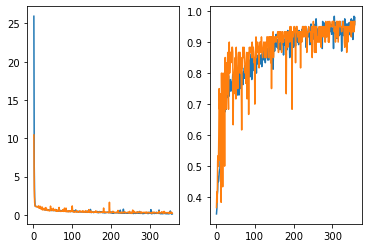

In [10]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)

plt.subplot(1,2,1)
plt.plot(epochs,loss)
plt.plot(epochs, val_loss)

plt.subplot(1,2,2)
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [11]:
model.save('trained_models/model.h5')
model.save_weights('trained_models/model_weights.h5')

In [12]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

'triangles'

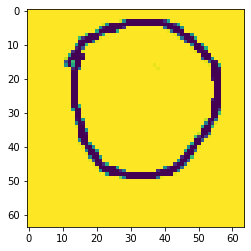

In [13]:
img = img_to_array(load_img("test.png",color_mode="grayscale",target_size=(IMAGE_SHAPE)))
img = img/255.
plt.imshow(img)
img = img.reshape([1] + list(img.shape))
list(traingen.class_indices.keys())[model.predict(img).argmax()]

In [14]:
model.predict(img)

array([[1.8223319e-02, 7.7222488e-05, 9.8169947e-01]], dtype=float32)

In [15]:
list(traingen.class_indices.keys())[model.predict(img).argmax()]

'triangles'